In [131]:
import networkx as nx
import os
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import datetime
import pytz
import matplotlib.pyplot as plt

In [132]:
%matplotlib inline

In [120]:
graph_files = os.listdir()
graph_files = [g for g in graph_files if g.endswith('.graphml') & g.startswith('2015-')]

In [121]:
graph_files

['2015-08-21T03:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T20:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T09:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T05:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T23:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T16:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T19:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T07:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T08:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T21:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T00:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T22:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T17:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T12:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T04:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graph

In [ ]:
graph_list = []

for eg in graph_files:
    G = nx.read_graphml(eg)
    date = eg.split("_")[0]
    date_dt = datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
    date_ts = date_dt.timestamp()
    graph_list.append((date_dt,G))

## Parameter Untersuchen
* k = {3,4,5} (gucken was in dem Paper stand was ein gutes k ist!)
* evtl. Netzwerke vorher Thresholden mit einem sinnvollem Wert (gucken was da ein guter Wert sein kann!)

## k = 3

In [ ]:
k = 3

kcc_stat = []

for date,g in graph_list:
    kcc = list(nx.community.k_clique_communities(g,k))
    l = [len(c) for c in kcc]
    l.sort(reverse=True)
    kcc_stat.append((date,len(kcc),l))

df3 = DataFrame(kcc_stat, columns=["date", "communities", "size"])

df3.sort_values(by='date')

In [157]:
df3.sort_values(by='date')

,date,communities,size
10,2015-08-21 00:00:00+00:00,34,"[604, 6, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3..."
21,2015-08-21 01:00:00+00:00,28,"[612, 11, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
22,2015-08-21 02:00:00+00:00,15,"[672, 6, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]"
0,2015-08-21 03:00:00+00:00,18,"[634, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3..."
14,2015-08-21 04:00:00+00:00,24,"[627, 8, 8, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3..."
3,2015-08-21 05:00:00+00:00,30,"[663, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3..."
19,2015-08-21 06:00:00+00:00,18,"[734, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3..."
7,2015-08-21 07:00:00+00:00,29,"[775, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3..."
8,2015-08-21 08:00:00+00:00,21,"[821, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3..."
2,2015-08-21 09:00:00+00:00,13,"[883, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]"


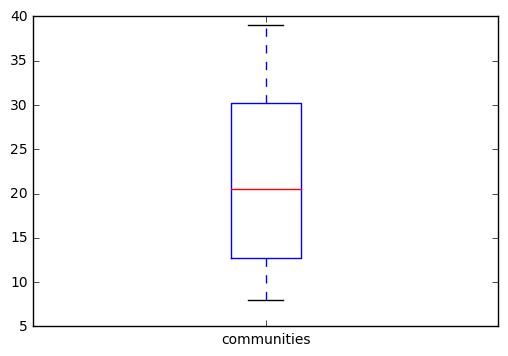

In [133]:
df3.sort_values(by='date').communities.plot.box()

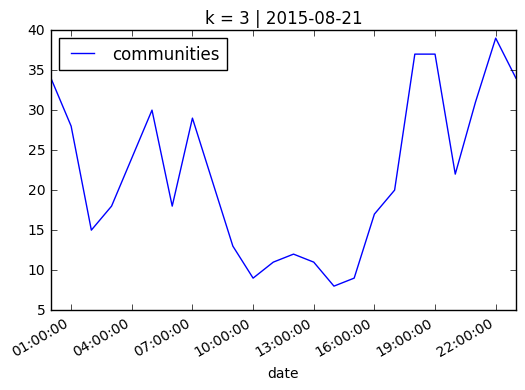

In [142]:
df3.set_index('date').plot(title="k = 3 | 2015-08-21")

In [ ]:
k = 4

kcc_stat = []

for date,g in graph_list:
    kcc = list(nx.community.k_clique_communities(g,k))
    l = [len(c) for c in kcc]
    l.sort(reverse=True)
    kcc_stat.append((date,len(kcc),l))

df4 = DataFrame(kcc_stat, columns=["date", "communities", "size"])

df4.sort_values(by='date')

In [126]:
df4.sort_values(by='date')

,date,communities,size
10,2015-08-21 00:00:00+00:00,74,"[236, 50, 9, 9, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, ..."
21,2015-08-21 01:00:00+00:00,74,"[394, 8, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5..."
22,2015-08-21 02:00:00+00:00,64,"[429, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4..."
0,2015-08-21 03:00:00+00:00,55,"[415, 28, 9, 8, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, ..."
14,2015-08-21 04:00:00+00:00,77,"[404, 13, 13, 12, 8, 8, 7, 7, 6, 6, 6, 5, 5, 5..."
3,2015-08-21 05:00:00+00:00,46,"[379, 56, 19, 14, 9, 7, 6, 6, 6, 5, 5, 5, 5, 5..."
19,2015-08-21 06:00:00+00:00,70,"[479, 23, 10, 8, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5,..."
7,2015-08-21 07:00:00+00:00,87,"[433, 68, 14, 12, 10, 9, 8, 8, 8, 8, 7, 7, 7, ..."
8,2015-08-21 08:00:00+00:00,79,"[594, 14, 12, 8, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5,..."
2,2015-08-21 09:00:00+00:00,128,"[696, 11, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 6, 6, ..."


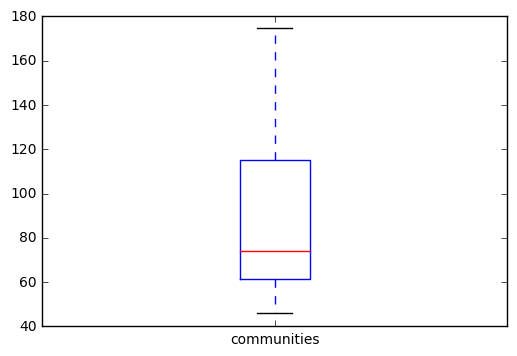

In [143]:
df4.sort_values(by='date').communities.plot.box()

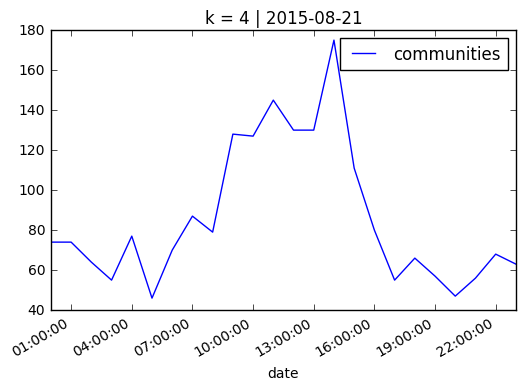

In [145]:
df4.set_index('date').plot(title="k = 4 | 2015-08-21")

In [ ]:
k = 5

kcc_stat = []

for date,g in graph_list:
    kcc = list(nx.community.k_clique_communities(g,k))
    l = [len(c) for c in kcc]
    l.sort(reverse=True)
    kcc_stat.append((date,len(kcc),l))

df5 = DataFrame(kcc_stat, columns=["date", "communities", "size"])

df5.sort_values(by='date')

In [127]:
df5.sort_values(by='date')

,date,communities,size
10,2015-08-21 00:00:00+00:00,16,"[114, 19, 14, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5,..."
21,2015-08-21 01:00:00+00:00,43,"[88, 28, 24, 18, 11, 10, 10, 7, 7, 6, 6, 6, 6,..."
22,2015-08-21 02:00:00+00:00,55,"[77, 65, 27, 20, 15, 11, 10, 10, 9, 9, 8, 8, 7..."
0,2015-08-21 03:00:00+00:00,49,"[103, 23, 12, 11, 11, 11, 10, 8, 8, 7, 7, 6, 6..."
14,2015-08-21 04:00:00+00:00,54,"[108, 28, 27, 11, 10, 9, 9, 9, 8, 8, 7, 7, 7, ..."
3,2015-08-21 05:00:00+00:00,59,"[140, 42, 23, 22, 10, 10, 9, 8, 8, 8, 7, 7, 7,..."
19,2015-08-21 06:00:00+00:00,40,"[142, 55, 27, 19, 11, 11, 7, 7, 7, 7, 6, 6, 6,..."
7,2015-08-21 07:00:00+00:00,60,"[95, 42, 40, 16, 15, 11, 10, 9, 8, 8, 7, 7, 7,..."
8,2015-08-21 08:00:00+00:00,58,"[233, 33, 26, 14, 10, 9, 9, 8, 8, 8, 8, 8, 7, ..."
2,2015-08-21 09:00:00+00:00,74,"[330, 21, 17, 13, 12, 11, 11, 9, 7, 6, 6, 6, 6..."


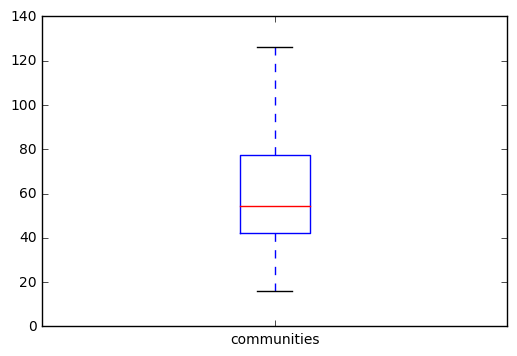

In [147]:
df5.sort_values(by='date').communities.plot.box()

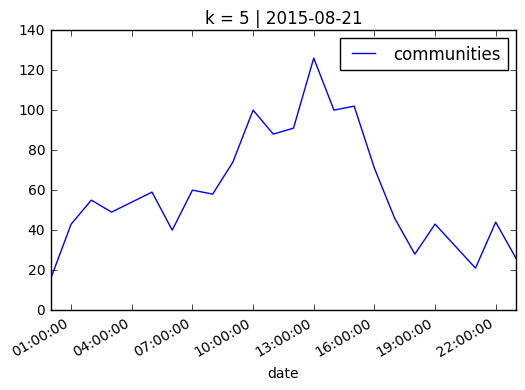

In [149]:
df5.set_index('date').plot(title="k = 5 | 2015-08-21")

In [150]:
k = 6

kcc_stat = []

for date,g in graph_list:
    kcc = list(nx.community.k_clique_communities(g,k))
    l = [len(c) for c in kcc]
    l.sort(reverse=True)
    kcc_stat.append((date,len(kcc),l))

df6 = DataFrame(kcc_stat, columns=["date", "communities", "size"])

df6.sort_values(by='date')

,date,communities,size
10,2015-08-21 00:00:00+00:00,9,"[52, 9, 7, 7, 7, 6, 6, 6, 6]"
21,2015-08-21 01:00:00+00:00,10,"[32, 8, 7, 7, 7, 7, 7, 6, 6, 6]"
22,2015-08-21 02:00:00+00:00,13,"[12, 11, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6]"
0,2015-08-21 03:00:00+00:00,8,"[39, 8, 7, 7, 6, 6, 6, 6]"
14,2015-08-21 04:00:00+00:00,17,"[16, 11, 11, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, ..."
3,2015-08-21 05:00:00+00:00,25,"[16, 12, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6..."
19,2015-08-21 06:00:00+00:00,25,"[28, 22, 22, 20, 19, 12, 11, 10, 10, 9, 9, 8, ..."
7,2015-08-21 07:00:00+00:00,11,"[17, 11, 9, 8, 7, 7, 6, 6, 6, 6, 6]"
8,2015-08-21 08:00:00+00:00,25,"[48, 32, 24, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 6, ..."
2,2015-08-21 09:00:00+00:00,50,"[90, 59, 18, 11, 11, 10, 10, 9, 9, 9, 9, 8, 8,..."


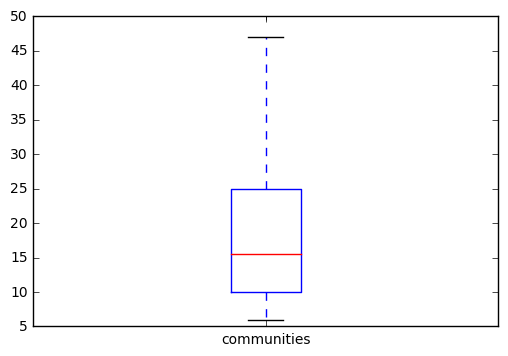

In [151]:
df6.sort_values(by='date').communities.plot.box()

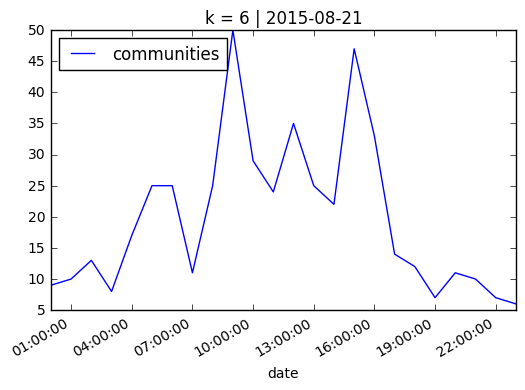

In [152]:
df6.set_index('date').plot(title="k = 6 | 2015-08-21")

In [153]:
k = 7

kcc_stat = []

for date,g in graph_list:
    kcc = list(nx.community.k_clique_communities(g,k))
    l = [len(c) for c in kcc]
    l.sort(reverse=True)
    kcc_stat.append((date,len(kcc),l))

df7 = DataFrame(kcc_stat, columns=["date", "communities", "size"])

df7.sort_values(by='date')

,date,communities,size
10,2015-08-21 00:00:00+00:00,6,"[11, 10, 8, 7, 7, 7]"
21,2015-08-21 01:00:00+00:00,2,"[13, 7]"
22,2015-08-21 02:00:00+00:00,1,[9]
0,2015-08-21 03:00:00+00:00,4,"[7, 7, 7, 7]"
14,2015-08-21 04:00:00+00:00,1,[8]
3,2015-08-21 05:00:00+00:00,3,"[7, 7, 7]"
19,2015-08-21 06:00:00+00:00,4,"[19, 10, 7, 7]"
7,2015-08-21 07:00:00+00:00,2,"[8, 7]"
8,2015-08-21 08:00:00+00:00,9,"[10, 8, 8, 8, 8, 7, 7, 7, 7]"
2,2015-08-21 09:00:00+00:00,17,"[33, 11, 11, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, ..."


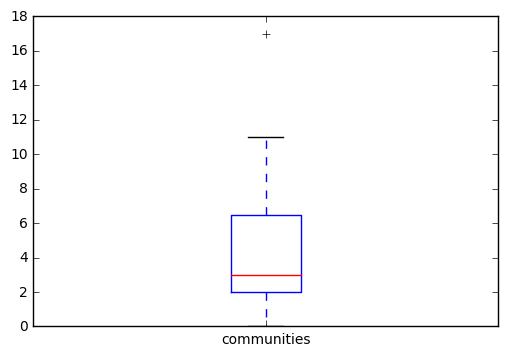

In [154]:
df7.sort_values(by='date').communities.plot.box()

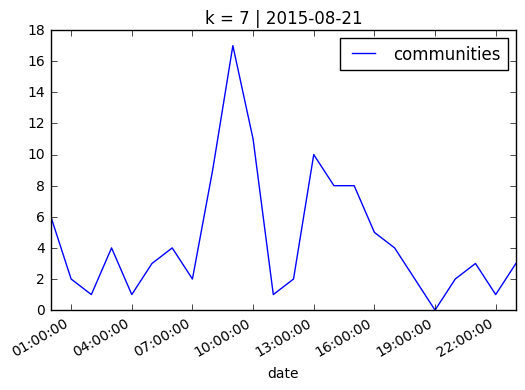

In [156]:
df7.set_index('date').plot(title="k = 7 | 2015-08-21")